# PRE - PARCIAL 2 (ADAPTATIVO Y ADAPTATIVO VECTORIZADO)| MÉTODOS COMPUTACIONALES II

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ADAPTATIVO

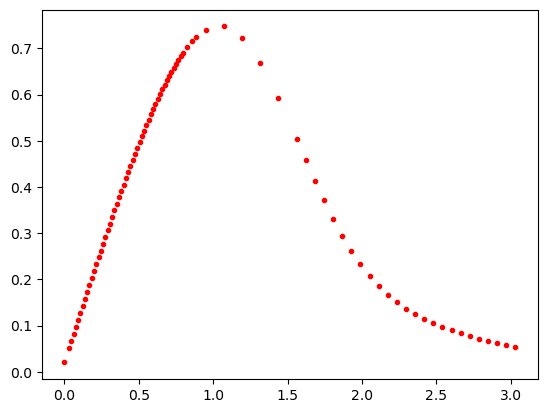

In [14]:
def f(x,t):
    return np.exp(x) - x*np.exp(t)


t = np.linspace(0.,3.,50)
x0 = 0.02


def Increment(f,x,t,h):
    
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1,t+0.5*h)
    k3 = f(x+0.5*h*k2,t+0.5*h)
    k4 = f(x+h*k3, t+h)
    
    Deltaf = h*(k1+2*k2+2*k3+k4)/6
    
    return x+Deltaf


def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h


def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    x = x0
    
    Time = np.array([t])
    Vector = np.array([x])
    Steps = np.array([h])
    
    while t < tf:
        
        Delta1 = Increment(f,x,t,h)
        Delta2 = Increment(f,x,t,0.5*h)
        Delta3 = Increment(f,x,t,2*h)
    
        dx,h = CheckStep(Delta1,Delta2,Delta3,h)
        
        x = Increment(f,x,t,h)
        t += h
        
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        Vector = np.append(Vector,x)
        
    return Time,Vector,Steps


t1,x1,h1 = Adaptativo(f,x0,t)

plt.scatter(t1,x1,marker='.',color='r')

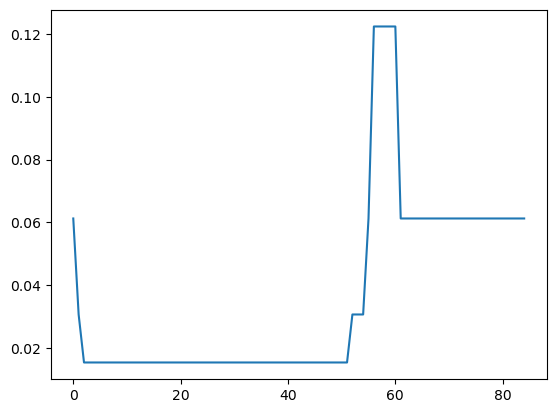

In [15]:
plt.plot(h1)